# Practice Opportunity
Now that you have completed Part 2 and had some more practice in performing data visualization for a single stock, try the following practice opportunity.

Using the Matplotlib library, plot a similar pie chart for JPMorgan Chase & Co. stock from 14 July 2017 to 16 December 2022.

You can access the Coding Lab for this lesson in the box below.

Note that it may take up to five minutes to load the lab. If you still have difficulty accessing the Coding Lab, download the Jupyter Notebook to run the exercise in your local environment (as described in the introductory lesson Environment Setup and Jupyter Notebook Walk-Through):

In [1]:
# using matplotlib for JPMorgan Chase & Co stock 2017 - 7 - 14 => 2022 - 12 - 16. Similar pie chat using function given

In [21]:
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np

In [22]:
def percentage_return_classifier(percentage_return):
    
    if percentage_return > -0.3 and percentage_return <= 0.3:
        return 'Insignificant Change'
    elif percentage_return > 0.3 and percentage_return <= 3:
        return 'Positive Change'
    elif percentage_return > -3 and percentage_return <= -0.3:
        return 'Negative Change'
    elif percentage_return > 3 and percentage_return <= 7:
        return 'Large Positive Change'
    elif percentage_return > -7 and percentage_return <= -3:
        return 'Large Negative Change'
    elif percentage_return > 7:
        return 'Bull Run'
    elif percentage_return <= -7:
        return 'Bear Sell Off'
    else:
        Exception("Unrecognized percentage_return")

In [23]:
# JPM_df = yf.Ticker("JPM").history(start=datetime(2017, 7, 14), end=datetime(2022, 12, 6))
JPM_df = pd.read_csv("JPM.csv")

In [24]:
JPM_df["Daily Return"] = JPM_df["Adj Close"].pct_change(1) * 100
JPM_df["Daily Return"] = JPM_df["Daily Return"].replace(np.nan, 0)

In [25]:
JPM_df["Trend"] = JPM_df["Daily Return"].apply(percentage_return_classifier)

In [26]:
JPM_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,0.000000,Insignificant Change
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243,Negative Change
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140,Negative Change
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732,Insignificant Change
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000,Insignificant Change
...,...,...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152,Positive Change
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867,Insignificant Change
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700,Negative Change
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800,-2.481072,Negative Change


In [27]:
trend_count = JPM_df["Trend"].value_counts()
trend_count

Trend
Positive Change          501
Negative Change          495
Insignificant Change     262
Large Positive Change     53
Large Negative Change     44
Bull Run                   7
Bear Sell Off              6
Name: count, dtype: int64

<Axes: ylabel='count'>

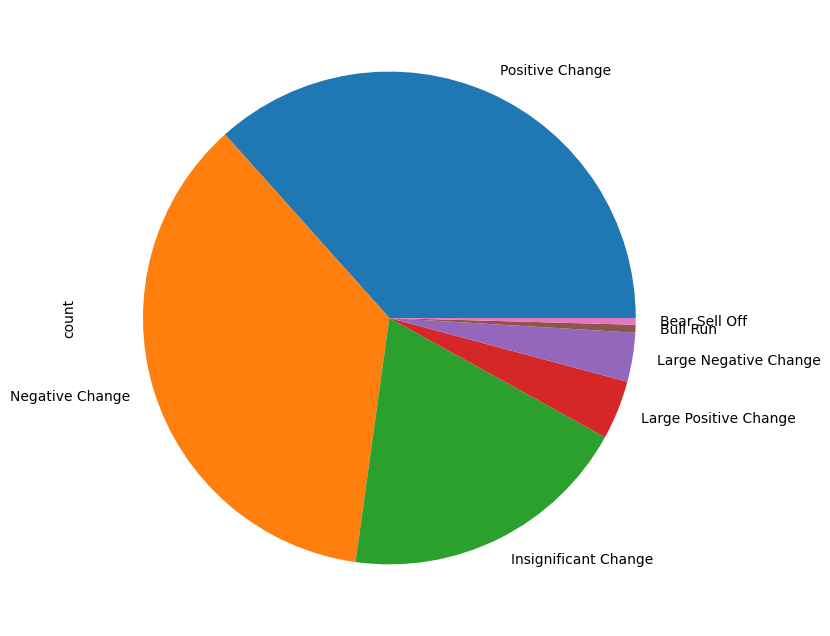

In [30]:
plt.figure(figsize=(8,8))
trend_count.plot(kind="pie", y="Trend")